# **Plotting Skin Friction *C<sub>f</sub>***

This notebook explains how to plot skin friction *C<sub>f</sub>* along with x-direction. As a bash script called *'Allrun'* will be executed, this python code will simultaneously executed in order to plot *C<sub>f</sub>*. In this case, we do not need to execute the python again. However, we should export this notebook to **'PlotCf.py'** file and copy it to each case folder that we would like to simulate.

In [1]:
#!/usr/bin/env python
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **1. Importing Related Variables from *'Allrun'* Shell Script**

In order to reduce the amount of code lines, we need to import some related values (e.g. farfield velocity, kinematic viscosity, model name, and yplus) from the *'Allrun'* script. All the variables except *'model'* are numbers, and therefore they are immediately changed to float or int. Regarding *'yp'* variable, it will be an integer value if the original *'yp'* does not contain any periods (i.e. it is not decimal), and vice versa.

In [2]:
# These lines that are commented out for the purpose of testing in jupyter notebook.
'''
UInf = 69.4
nuInf = 1.388e-05
model = "kOmegaSST"
yp = 1
'''
UInf = float(os.environ["UInf"])
nuInf = float(os.environ["nuInf"])
model = os.environ["model"]
yp = os.environ["yp"]
if (yp.find('.') == -1):
    yp = int(os.environ["yp"])
else:
    yp = float(os.environ["yp"])

'\nUInf = float(os.environ["UInf"])\nnuInf = float(os.environ["nuInf"])\nmodel = os.environ["model"]\nyp = os.environ["yp"]\nif (yp.find(\'.\') == -1):\n    yp = int(os.environ["yp"])\nelse:\n    yp = float(os.environ["yp"])\n'

## **2. Load Data**
A \*.*csv* file that is created during simulation is loaded to python. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided.

In [3]:
# This line that is commented out for the purpose of testing in jupyter notebook.
#tauw_path = '../run/turbulentFlatPlate2/tauw_{}_{}.csv'.format(model, str(yp))
tauw_path = 'tauw_{}_{}.csv'.format(model, str(yp))
tauw_data = pd.read_csv(tauw_path, delim_whitespace=True)
tauw_data.head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.7382,-0.938492,0
1,0.001458,-19.9022,-0.094805,0
2,0.002433,-14.5502,-0.016927,0
3,0.003410,-12.1958,-0.008369,0
4,0.004390,-10.8499,-0.005264,0


## **3. Calculation of *'Re<sub>x</sub>'* and *'C<sub>f</sub>'***

*'Re<sub>x</sub>'* should be calculated for x-axis, and *'C<sub>f</sub>'* is to be found for y-axis. This simulation case is incompressible, and thus only the kinematic viscosity is used.

In [4]:
x0 = 0
Rex = (tauw_data['ccx'] - x0)*UInf/nuInf
Cf = np.sqrt(tauw_data['tau_xx']*tauw_data['tau_xx'] + tauw_data['tau_yy']*tauw_data['tau_yy'] + tauw_data['tau_zz']*tauw_data['tau_zz'])/(0.5*UInf**2)

## **4. Experimental Data by Wieghardt**

The experimental data is to be calculated for comparing between simulation and experimental data.

In [5]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## **5. Plot**

Skin friction *'C<sub>f</sub>'* is plotted along with *'Re<sub>x</sub>'*. Since we execute this code in the shell script which contains loops for several yplus values, graphs for each case will be created in the case folder as a \*.*pdf* format.

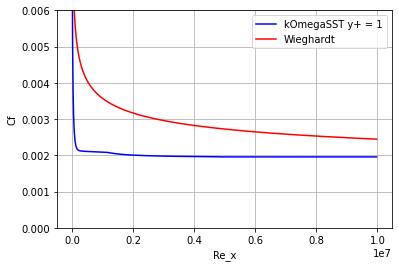

In [6]:
plt.figure()
plt.ylim([0, 0.006])
plt.plot(Rex, Cf, color = 'b', label = "{} y+ = {}".format(model, str(yp)))
plt.plot(Rex, wieghardt, color = 'r', label = "Wieghardt")
plt.xlabel("Re_x")
plt.ylabel("Cf")
plt.grid()
plt.legend()
plt.savefig("tauw_{}_{}.pdf".format(model, str(yp)))